In [106]:
#https://www.youtube.com/watch?v=j05UUs99eNQ&list=RDCMUCtxCXg-UvSnTKPOzLH4wJaQ&index=4


#https://www.youtube.com/watch?v=2XGSIlgUBDI 
#https://github.com/nachi-hebbar/Time-Series-Forecasting-MachineLearning/blob/main/Time_Series_Forecasting_ML.ipynb

# Supervised Timeseries forecastingXGBoost Regressor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.pandas.set_option("display.max_columns",None)


#Plotting
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor

from statsmodels.tsa.ar_model import AutoReg

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

# Dataset

In [2]:
df_lag = pd.read_csv(r'C:\Users\saksh\OneDrive\Desktop\ML\PROJECT\Iteration 2\all_features_lags_v1.csv')

In [4]:
df_lag

,date,product,sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
0,2018-09-21,Accessories,404,6.0,2.0,241.0,98.0,180.0,202.0,95.0,1.0,2102.0,876.0,568.0,3.0,1.0,396.0
1,2018-09-21,Cosmetic,4,404.0,6.0,2.0,241.0,98.0,180.0,202.0,95.0,1.0,2102.0,876.0,568.0,3.0,1.0
2,2018-09-21,Garment Full body,545,4.0,404.0,6.0,2.0,241.0,98.0,180.0,202.0,95.0,1.0,2102.0,876.0,568.0,3.0
3,2018-09-21,Garment Lower body,895,545.0,4.0,404.0,6.0,2.0,241.0,98.0,180.0,202.0,95.0,1.0,2102.0,876.0,568.0
4,2018-09-21,Garment Upper body,2184,895.0,545.0,4.0,404.0,6.0,2.0,241.0,98.0,180.0,202.0,95.0,1.0,2102.0,876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9660,2020-09-22,Socks & Tights,128,84.0,60.0,10.0,1284.0,625.0,408.0,4.0,256.0,49.0,174.0,67.0,132.0,77.0,59.0
9661,2020-09-22,Swimwear,63,128.0,84.0,60.0,10.0,1284.0,625.0,408.0,4.0,256.0,49.0,174.0,67.0,132.0,77.0
9662,2020-09-22,Underwear,190,63.0,128.0,84.0,60.0,10.0,1284.0,625.0,408.0,4.0,256.0,49.0,174.0,67.0,132.0
9663,2020-09-22,Underwear/nightwear,1,190.0,63.0,128.0,84.0,60.0,10.0,1284.0,625.0,408.0,4.0,256.0,49.0,174.0,67.0


# Method1/
https://www.youtube.com/watch?v=Wsfz3i1AXzY

In [5]:
features = ['lag_1', 'lag_2','lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9',  'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14']
label = ['sales']
test_df = df_lag[df_lag['date'] >= '2020-07-01']
train_df = df_lag[df_lag['date'] < '2020-07-01']
X_train, y_train = train_df[features], train_df[label]
X_test, y_test = test_df[features], test_df[label]

In [6]:
X_train

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
0,6.0,2.0,241.0,98.0,180.0,202.0,95.0,1.0,2102.0,876.0,568.0,3.0,1.0,396.0
1,404.0,6.0,2.0,241.0,98.0,180.0,202.0,95.0,1.0,2102.0,876.0,568.0,3.0,1.0
2,4.0,404.0,6.0,2.0,241.0,98.0,180.0,202.0,95.0,1.0,2102.0,876.0,568.0,3.0
3,545.0,4.0,404.0,6.0,2.0,241.0,98.0,180.0,202.0,95.0,1.0,2102.0,876.0,568.0
4,895.0,545.0,4.0,404.0,6.0,2.0,241.0,98.0,180.0,202.0,95.0,1.0,2102.0,876.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,62.0,3.0,1448.0,924.0,735.0,1.0,1.0,2.0,366.0,35.0,199.0,173.0,1.0,108.0
8524,166.0,62.0,3.0,1448.0,924.0,735.0,1.0,1.0,2.0,366.0,35.0,199.0,173.0,1.0
8525,96.0,166.0,62.0,3.0,1448.0,924.0,735.0,1.0,1.0,2.0,366.0,35.0,199.0,173.0
8526,181.0,96.0,166.0,62.0,3.0,1448.0,924.0,735.0,1.0,1.0,2.0,366.0,35.0,199.0


In [7]:
reg = XGBRegressor(n_estimators=500, learning_rate=0.01)
reg.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae')

[0]	validation_0-mae:303.36917	validation_1-mae:266.96188
[1]	validation_0-mae:300.62259	validation_1-mae:264.41879
[2]	validation_0-mae:297.89752	validation_1-mae:261.88602
[3]	validation_0-mae:295.25485	validation_1-mae:259.44403
[4]	validation_0-mae:292.62482	validation_1-mae:256.98218
[5]	validation_0-mae:290.05426	validation_1-mae:254.48244
[6]	validation_0-mae:287.51834	validation_1-mae:252.02603
[7]	validation_0-mae:285.01553	validation_1-mae:249.59670
[8]	validation_0-mae:282.54773	validation_1-mae:247.19704
[9]	validation_0-mae:280.10745	validation_1-mae:244.97098
[10]	validation_0-mae:277.68854	validation_1-mae:242.63091
[11]	validation_0-mae:275.28451	validation_1-mae:240.30489
[12]	validation_0-mae:272.93936	validation_1-mae:238.01622
[13]	validation_0-mae:270.58829	validation_1-mae:235.74541
[14]	validation_0-mae:268.30380	validation_1-mae:233.54013
[15]	validation_0-mae:266.01740	validation_1-mae:231.32440
[16]	validation_0-mae:263.76526	validation_1-mae:229.08110
[17]	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [8]:
predictions = reg.predict(X_test)


In [9]:
test_df = test_df.reset_index().drop('index', axis=1)
test_df['predictions'] = pd.Series(predictions)

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


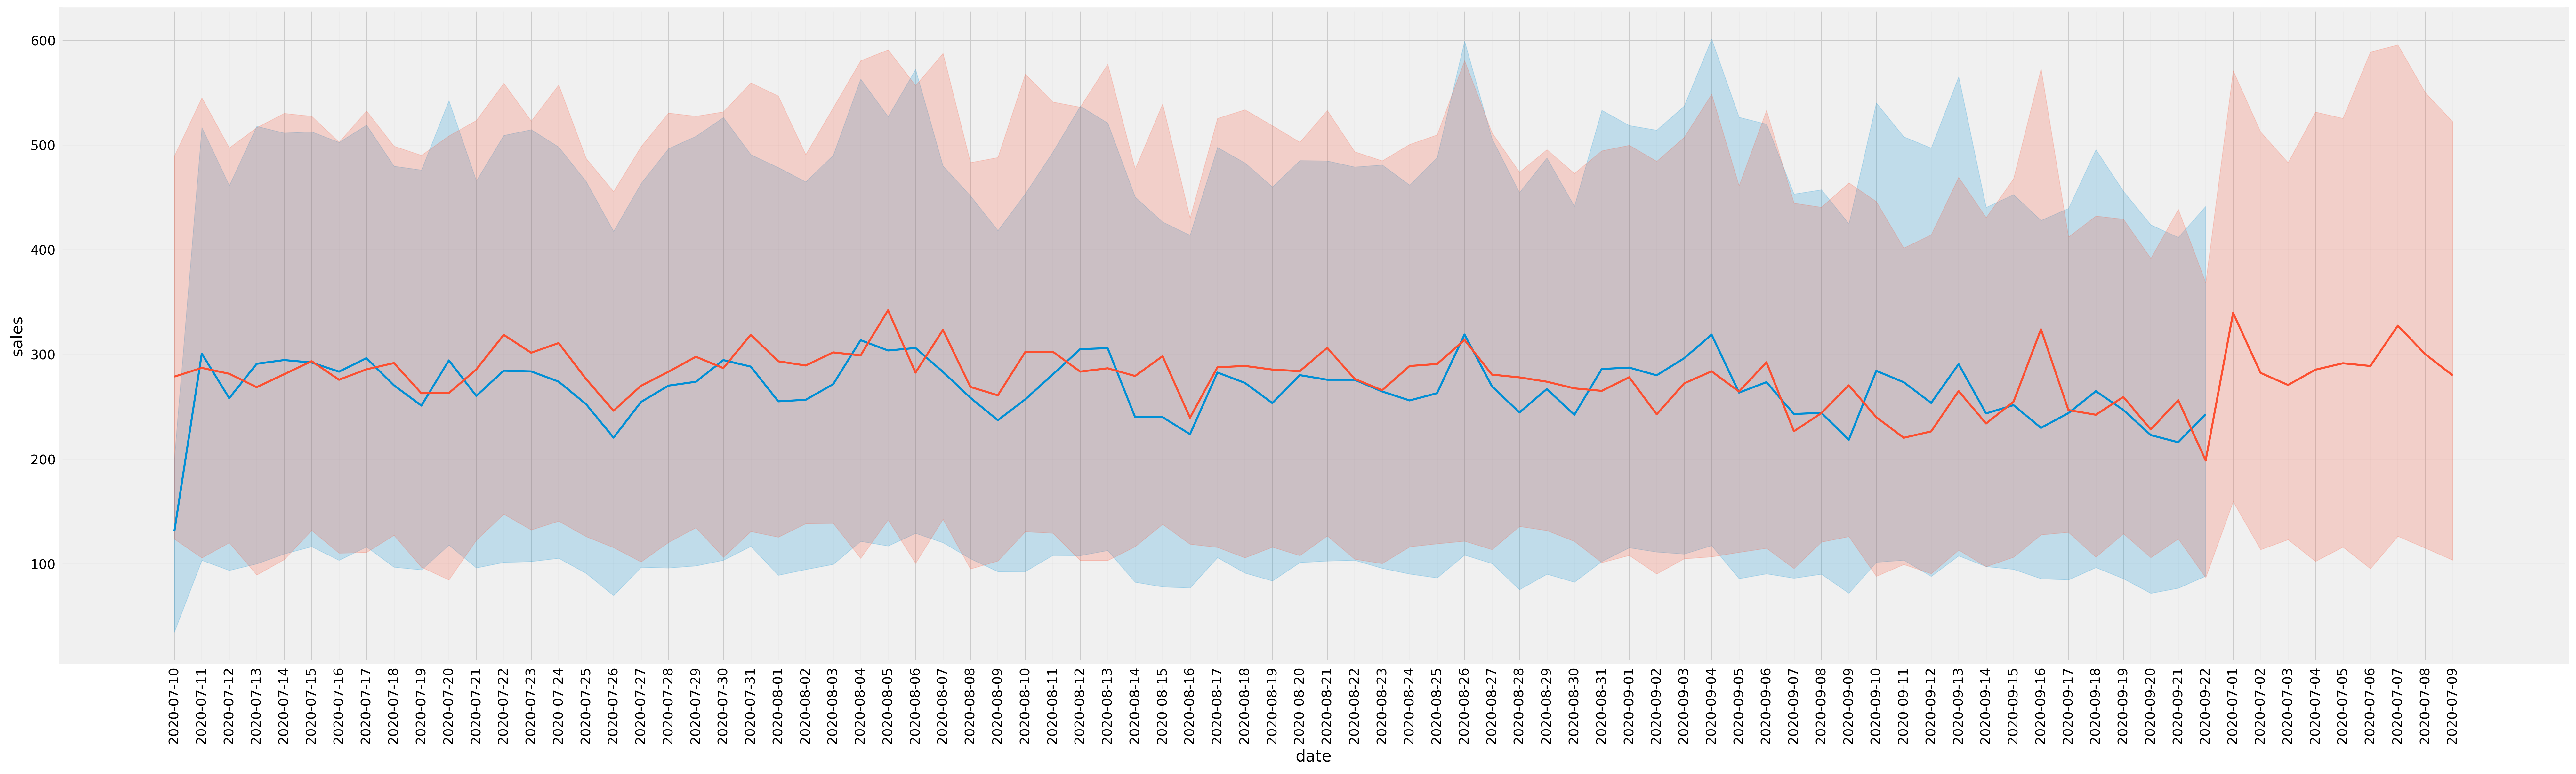

In [11]:
plt.rcParams.update({'figure.figsize': (30, 9), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=df_lag.tail(1000), x='date', y='sales')
sns.lineplot(data=test_df, x='date', y='predictions')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [12]:
test_df

,date,product,sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,predictions
0,2020-07-01,Accessories,359,34.0,220.0,181.0,96.0,166.0,62.0,3.0,1448.0,924.0,735.0,1.0,1.0,2.0,366.0,250.686905
1,2020-07-01,Bags,2,359.0,34.0,220.0,181.0,96.0,166.0,62.0,3.0,1448.0,924.0,735.0,1.0,1.0,2.0,82.613861
2,2020-07-01,Cosmetic,2,2.0,359.0,34.0,220.0,181.0,96.0,166.0,62.0,3.0,1448.0,924.0,735.0,1.0,1.0,251.420639
3,2020-07-01,Furniture,1,2.0,2.0,359.0,34.0,220.0,181.0,96.0,166.0,62.0,3.0,1448.0,924.0,735.0,1.0,541.750000
4,2020-07-01,Garment Full body,733,1.0,2.0,2.0,359.0,34.0,220.0,181.0,96.0,166.0,62.0,3.0,1448.0,924.0,735.0,601.936890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,2020-09-22,Socks & Tights,128,84.0,60.0,10.0,1284.0,625.0,408.0,4.0,256.0,49.0,174.0,67.0,132.0,77.0,59.0,123.222443
1133,2020-09-22,Swimwear,63,128.0,84.0,60.0,10.0,1284.0,625.0,408.0,4.0,256.0,49.0,174.0,67.0,132.0,77.0,101.161156
1134,2020-09-22,Underwear,190,63.0,128.0,84.0,60.0,10.0,1284.0,625.0,408.0,4.0,256.0,49.0,174.0,67.0,132.0,157.599274
1135,2020-09-22,Underwear/nightwear,1,190.0,63.0,128.0,84.0,60.0,10.0,1284.0,625.0,408.0,4.0,256.0,49.0,174.0,67.0,16.948301


In [13]:
from math import sqrt
rmse_rf=sqrt(mean_squared_error(predictions,y_test))
print('Mean Squared Error for XGBoost is:',rmse_rf)

Mean Squared Error for XGBoost is: 129.75162827887166


In [14]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,predictions))

MAE 74.80685994928095


In [15]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,predictions))))


RMSE 4.865622071322721


In [16]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print(r2)

0.8825202046177038
